iter 0: cur_l=312.9639625148067
iter 1: cur_l=298.0334568193197
iter 2: cur_l=266.29655385295194
iter 3: cur_l=266.29655385295194
iter 4: cur_l=266.29655385295194
iter 5: cur_l=266.29655385295194
iter 6: cur_l=266.29655385295194
iter 7: cur_l=266.29655385295194
iter 8: cur_l=266.29655385295194
iter 9: cur_l=266.29655385295194


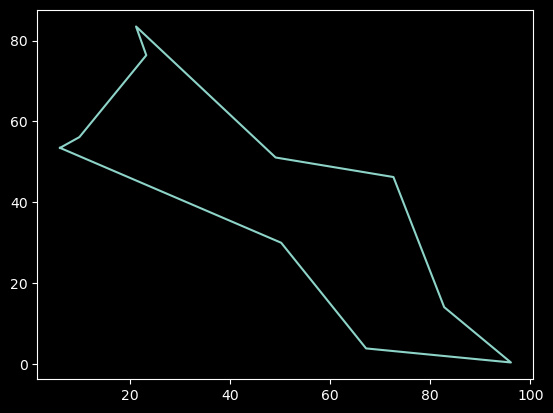

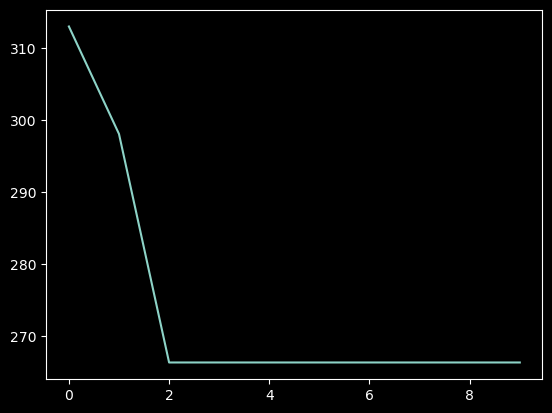

In [9]:
# 蚁群算法
import random
# 导入自定义工具包，其中可能包含 calc 和 plot_ans 等函数
from util import *
import matplotlib.pyplot as plt
import json

# 从文件 "points.json" 中读取点的坐标信息
with open("points.json","r") as f:
    txt=f.readline()
# 将读取的文本解析为 Python 列表
points=json.loads(txt)

# 获取点的数量
N=len(points)

# 初始化启发式信息矩阵 eta，eta[i][j] 表示从点 i 到点 j 的启发式信息
eta=[[0 for _ in range(N)]for _ in range(N)]
# 初始化信息素矩阵 gamma，gamma[i][j] 表示从点 i 到点 j 的信息素浓度
gamma=[[0.2 for _ in range(N)]for _ in range(N)]

# 信息素重要程度因子，控制信息素在路径选择中的影响
alpha=1
# 启发式信息重要程度因子，控制启发式信息在路径选择中的影响
beta=1
# 蚂蚁的数量
ants=10
# 信息素蒸发率，控制信息素随时间的衰减程度
evap=0.4
# 常量 D，用于计算信息素增量
D=10

# 计算启发式信息矩阵 eta
for i in range(N):
    for j in range(i+1,N):
        # 计算两点之间的欧几里得距离
        dist=((points[i][0]-points[j][0])**2+(points[i][1]-points[j][1])**2)**0.5
        # 启发式信息定义为距离的倒数
        eta[i][j]=1/dist
        eta[j][i]=1/dist

# 选择路径的函数
def choose_path(start,eta,gamma,alpha,beta,points):
    # 获取点的数量
    N = len(points)
    # 初始化访问标记数组，用于记录每个点是否被访问过
    visited = [False] * N
    # 将起始点标记为已访问
    visited[start] = True
    # 初始化路径列表，存储蚂蚁走过的路径
    ans = [start]

    # 循环 N - 1 次，因为已经有起始点，还需要选择 N - 1 个点
    for _ in range(N - 1):
        # 获取当前所在的点
        cur=ans[-1]
        # 初始化下一个点的索引
        nxt = 0
        # 找出所有未被访问过的点作为候选点
        candidate=[x for x in range(N) if not visited[x]]
        # 初始化最小长度为一个很大的值
        min_len = 1e9
        # 初始化候选点的选择权重列表
        weight=[]
        # 计算每个候选点的选择权重
        for x in candidate:
            weight.append(eta[cur][x]**alpha*gamma[cur][x]**beta)
        # 根据权重随机选择一个候选点作为下一个点
        nxt=random.choices(candidate,weights=weight,k=1)[0]
        # 将下一个点添加到路径列表中
        ans.append(nxt)
        # 将下一个点标记为已访问
        visited[nxt] = True
    # 这里注释掉了将起始点添加到路径末尾的代码，可能用于形成回路
    # ans.append(start)
    return ans

# 初始化最优路径的长度为一个很大的值
best_dist=1e10
# 初始化最优路径列表
best=[]
# 用于记录每一轮迭代的最优路径长度
rec=[]

# 进行 10 轮迭代
for iter in range(10):
    # 初始化信息素增量矩阵 delta_gamma，用于记录每只蚂蚁对信息素的更新量
    delta_gamma=[[0 for _ in range(N)]for _ in range(N)]
    # 每只蚂蚁进行路径选择
    for ant in range(ants):
        # 选择一条路径
        p=choose_path(ant,eta,gamma,alpha,beta,points)
        # 计算当前路径的长度
        cur_dist=calc(p,points)
        # 如果当前路径长度小于最优路径长度，则更新最优路径长度和最优路径
        if cur_dist<best_dist:
            best_dist=cur_dist
            best=p
        # 计算每段路径的信息素增量
        for i in range(N-1):
            # 计算信息素增量
            delta=D/(((points[p[i]][0]-points[p[i+1]][0])**2+(points[p[i]][1]-points[p[i+1]][1])**2)**0.5)
            # 更新信息素增量矩阵
            delta_gamma[p[i]][p[i+1]]+=delta
            delta_gamma[p[i+1]][p[i]] += delta
        # 处理路径的首尾段信息素增量
        delta = D / (((points[p[0]][0] - points[p[-1]][0]) ** 2 + (points[p[0]][1] - points[p[-1]][1]) ** 2) ** 0.5)
        delta_gamma[p[0]][p[-1]] += delta
        delta_gamma[p[-1]][p[0]] += delta
    # 更新信息素矩阵
    for i in range(N):
        for j in range(N):
            # 根据信息素蒸发率和信息素增量更新信息素矩阵
            gamma[i][j]=gamma[i][j]*evap+delta_gamma[i][j]

    # 打印当前迭代轮数和最优路径长度
    print("iter {}: cur_l={}".format(iter, best_dist))
    # 记录当前迭代的最优路径长度
    rec.append(best_dist)

# 绘制最优路径
plot_ans(best,points)
# 绘制每一轮迭代的最优路径长度变化曲线
plt.plot(rec)
# 显示图形
plt.show()